## Machine Learning Fundamentals: Gradient Descent
Author: Jinwoo Ahn

Previously, we discussed that <b>it is important to minimize the error that comes from our model's predictions</b> and that to do so, <b>we have to choose the appropriate coefficients</b>. In <b>Machine Learning Fundamentals: Cost Functions</b>, we visualized the cost function and visually spotted the minimum point. In this tutorial, we are going to discuss the <b>Gradient Descent Algorithm</b> which will allow us to find the minimum values of the coefficients.

### Libraries & Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### What Is Gradient Descent?

As discussed earlier, the ultimate goal of using <b>Gradient Descent</b> is to find the optimal parameters for our learning model.

Recall from our discussion about <b>Linear Regression</b> that our regression line is in the following format:

$$f_{a,b}(x_{i}) = ax_{i} + b$$

Also recall from our discussion about <b>Cost Functions</b> that our formula for cost function is in the following format:

$$c(a,b) = \frac{1}{2n} \sum\limits_{i = 0}^{n-1} (f_{a,b}(x_{(i)}) - y_{(i)})^2$$

What we are trying to do here is find the appropriate values for $a$ and $b$ such that we minimize $c(a, b)$.

The general steps you will take when running to algorithm as such:
1. <b>Start with a random point ($a$, $b$)</b> (e.g. $a = 0$, $b = 0$)
2. <b>Change the values of $a$ and $b$ to minimize $c(a, b)$
3. <b>Continue #2 until you reach a minimum</b> (i.e. change in $c(a, b)$ is negligible)

### What Does This Look Like?

So I get the point and the process of using the gradient descent algorithm, but <b>how does this actually work</b>?

<b>Great question</b>! Before we get into the mathematical details, let us try to <b>visualize</b> this to try to really have the intuitive understanding of how the algorithm works.

<figure>
    <center> <img src="./gradient_descent.jpg"  style="width:800px;height:500px;" ></center>
</figure>

<b>X-axis: $a$</b>

<b>Y-axis: $b$</b>

<b>Z-axis: $c(a, b)$</b>

Source: https://blog.paperspace.com/part-2-generic-python-implementation-of-gradient-descent-for-nn-optimization/

Following the steps provided above, let's try to follow the lines shown in the diagram above.
1. <b>We begin at the top point in the red region</b> (Note: the initial point might not always be the origin)
2. <b>We change the values of $a$ and $b$ by small amounts and repeat this process.
3. Ultimately, <b>we reach the minimum</b> down there in the blue region.

### What Does This Look Like Mathematically?

The natural follow up question that may be asked is: <b>So, by how much are we changing the values of $a$ and $b$</b>?

We use the following equations:
    
$$\begin{align*}
a_{new} &= a -  \gamma \frac{\partial c(a,b)}{\partial a} \newline 
b_{new} &= b -  \gamma \frac{\partial c(a,b)}{\partial b}  \newline
\end{align*}$$

The essential idea behind this equation is that we are <b>updating $a$ and $b$</b> by subtracting the product of what is called the <b>learning rate</b> and the <b>slope</b>.

### What Is Learning Rate?

Now, I am assuming you understand what the slope is but not the <b>learning rate</b>. The <b>learning rate</b> is a fancy way of saying <b>step size</b>. Remember how we decided just now by how much we will move on each step to move towards the minimum? This is what the <b>learning rate</b> does.

### Why Does This Matter?

Let us try to only visualize the relationship between the <b>cost function $c$</b> and the <b>coefficient $a$</b>.

#### 1. If $\beta$ Is Too Small...

Text(0, 0.5, '$c(a)$')

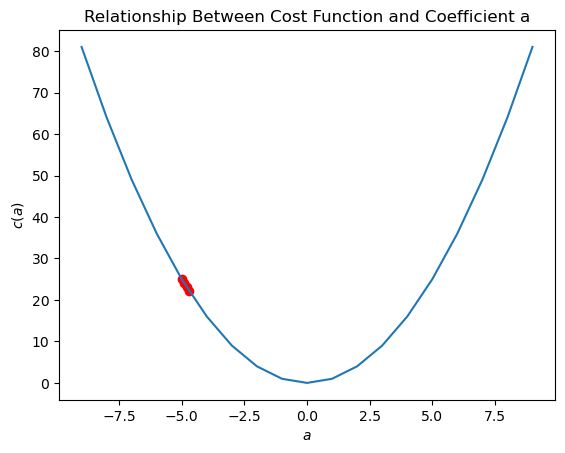

In [2]:
x = np.arange(-9, 10)
y = x ** 2

plt.plot(x, y)
plt.scatter(-5, 25, color="red")
plt.scatter(-4.9, 24.01, color="red")
plt.scatter(-4.8, 23.04, color="red")
plt.scatter(-4.7, 22.09, color="red")

plt.title("Relationship Between Cost Function and Coefficient a")
plt.xlabel("$a$")
plt.ylabel("$c(a)$")

Take a look at this graph. The dots show the progress after each iteration of the gradient descent algorithm. <b>The progress is minimal</b> because our <b>learning rate is too small</b>. As you can see, this will take a long time to each the point (0, 0).

Hence, we can conclude that <b>an extremeley small learning rate will cause a long computation time to reach the minimum value</b>.

#### 2. If $\beta$ Is Too Large...

Text(0, 0.5, '$c(a)$')

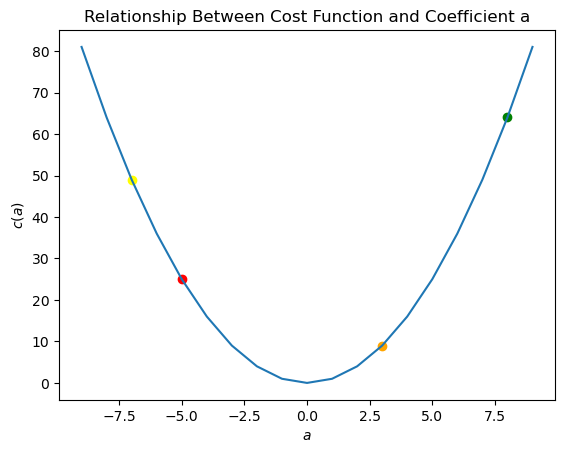

In [3]:
x = np.arange(-9, 10)
y = x ** 2

plt.plot(x, y)
plt.scatter(-5, 25, color="red")
plt.scatter(3, 9, color="orange")
plt.scatter(-7, 49, color="yellow")
plt.scatter(8, 64, color="green")

plt.title("Relationship Between Cost Function and Coefficient a")
plt.xlabel("$a$")
plt.ylabel("$c(a)$")

Take a look at this graph where the points in the order of rainbow colors (red, orange, yellow, green, etc.) Because the learning rate is too large, we face a case where <b>the point of minimum is continously being skipped</b>.

Hence, we can conclude that <b>an extremeley large learning rate will cause the algorithm to diverge</b> which means that it will not reach the minimum.

### What Does This Look Like in Code?

Let's try to compute the gradient first, which are as follows:

$$\frac{\partial c(a,b)}{\partial a} = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{a,b}(x_{(i)}) - y_{(i)})*x_{(i)}$$

$$\frac{\partial c(a,b)}{\partial b} = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{a,b}(x_{(i)}) - y_{(i)})$$

In [ ]:
def gradient(x, y, a, b):
    m = x.shape[0]
    dc_da = 0
    dc_db = 0
    
    for i in range(m):
        f_ab = a * x[i] + b
        
        # the x term stays because partial derivative with respect to the slope
        dc_da_i = (f_ab - y[i]) * x[i]
        # the x term is gone because partial derivative with respect to the intercept
        dc_db_i = f_ab - y[i]
        
        dc_da += dc_da_i
        dc_db += dc_db_i
        
    dc_da /= m
    dc_db /= m
    
    return dc_da, dc_db

Now, we can implement <b>gradient descent</b> using the above function.

In [6]:
def gradient_descent(arg):
    # Code
    return

### What's Next?

Congratulations on finishing the <b>Gradient Descent</b> tutorial. Next, we will discuss <b>Multple Linear Regression</b>!